## Visualisation - static homogeneous sessions
In this notebook I reformat the data so that it lends itself to being visualised and analysed. Then I apply a range of visualisation techniques in order to extract insights from the data.

In [2]:
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import glob
import os

### Preprocessing

In [3]:
path = r'/home/karolina/ieft_cw/data/shom' 
all_files = glob.glob(os.path.join(path, '*.csv'))

df =pd.DataFrame()
df.to_csv("shom_1.csv", 'w')
for f in all_files:
     if 'avg_bal' in f:
          n_rows = sum(1 for row in open(f, 'r'))
          row = pd.read_csv(f, skiprows=(n_rows - 2))
          row.to_csv("shom_1.csv", mode='a', index=False, header=False)

# df contains the combined static homogenous sessions average final balances sorted by the run description string
df = pd.read_csv("shom_1.csv", names = ['run', 'trade', 'best_bid', 'best_offer', 'trader_name', 'total_profit', 'traders_number', 'avg_profit'])
df = df.iloc[1: , :]
df = df.sort_values(by=['run'])

#the run number, k and F are extracted from the run string and added as columns to the dataframe
run_n = [str(i)[5] for i in df['run']]
df = df.assign(run_n=run_n)

# now the chars are converted to int and then column k
k = []
for i in df['run']:
    j = 7
    num_temp = ''
    while str(i)[j] != '_':
        num_temp = num_temp + str(i)[j]
        j = j+1
    k.append(int(num_temp))
df = df.assign(k=k)

# same for F
f = [float(str(i)[-3:]) for i in df['run']]
df = df.assign(F=f)

#drop the run name and and dump to a new csv file
df.drop('run', inplace=True, axis=1)
df = df.sort_values(by=['run_n', 'k', 'F'])
df.to_csv('shom_2.csv', columns = ['trade', 'best_bid', 'best_offer', 'trader_name', 'total_profit', 'traders_number', 'avg_profit', 'run_n', 'k', 'F'])

### Visualisation

In [27]:
df2 = pd.read_csv('shom_2.csv', names = ['trade', 'best_bid', 'best_offer', 'trader_name', 'total_profit', 'traders_number', 'avg_profit', 'run_n', 'k', 'F'])
df2 = df2.iloc[1: , :]
df2.head()

,trade,best_bid,best_offer,trader_name,total_profit,traders_number,avg_profit,run_n,k,F
676.0,300.0,128.0,167.0,PRDE,20965.0,60.0,349.416667,0,4,0.0
431.0,300.0,158.0,162.0,PRDE,22174.0,60.0,369.566667,0,4,0.2
888.0,300.0,161.0,173.0,PRDE,18220.0,60.0,303.666667,0,4,0.4
438.0,300.0,121.0,150.0,PRDE,23014.0,60.0,383.566667,0,4,0.6
810.0,300.0,162.0,189.0,PRDE,15246.0,60.0,254.1,0,4,0.8


In [4]:
#summarize all runs
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
F_range = np.linspace(0.0, 2.0, 10)
F_range = [float(str(j)[0:3]) for j in F_range]

df_sum = pd.DataFrame(columns=['k', 'F', 'avg_profit'])

df_sum['k'] = [k for k in df['k'].head(90)]
df_sum['F'] = [f for f in df['F'].head(90)]

avg_prof_means = []
for index, row in df.iterrows():
    if int(row['run_n']) == 0:
        avg_prof_means.append(row['avg_profit'])
    else:
        avg_prof_means[index%90] += row['avg_profit']

avg_prof_means = [i/10 for i in avg_prof_means]
df_sum['avg_profit'] = avg_prof_means

df_sum.to_csv('shom_sum.csv', columns = ['k', 'F', 'avg_profit'])

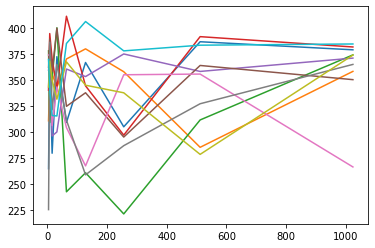

In [147]:
#average profit by k with F as colors, but the data is from a mean of all 10 runs for readability
F_range = np.linspace(0.0, 2.0, 10)
for j in F_range:
    dfx = df_sum.loc[df_sum['F'] == float(str(j)[0:3])]
    plt.plot(dfx['k'], dfx['avg_profit'])

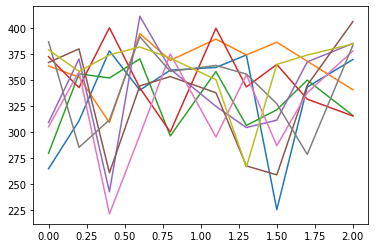

In [150]:
#average profit by F with k as colors, but the data is from a mean of all 10 runs for readability
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
for j in k_range:
    dfx = df_sum.loc[df_sum['k'] == j]
    plt.plot(dfx['F'], dfx['avg_profit'])

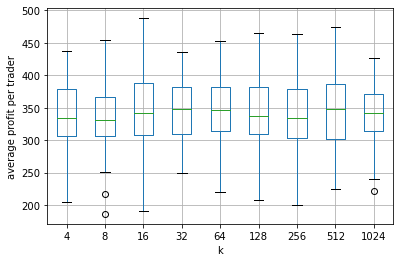

In [44]:
boxplot = df.boxplot(column='avg_profit', by = 'k')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

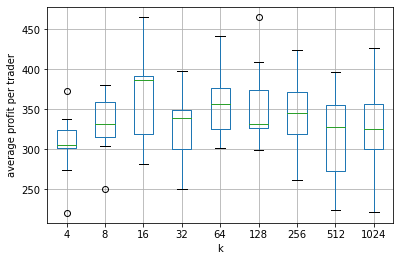

In [13]:
dfF = df.loc[df['F'] == 2.0]
dfF.head()
boxplot = dfF.boxplot(column='avg_profit', by = 'k')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

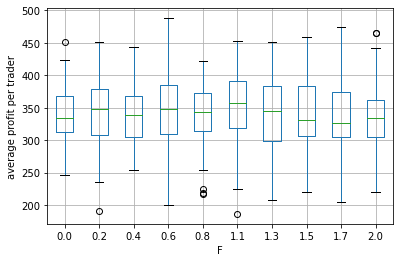

In [45]:
boxplot = df.boxplot(column='avg_profit', by = 'F')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

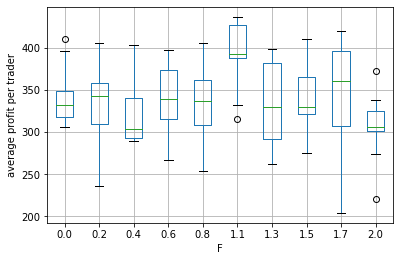

In [58]:
dfk = df.loc[df['k'] == 4]
dfk.head()
boxplot = dfk.boxplot(column='avg_profit', by = 'F')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

#### Best values
Get the best parameter values

In [5]:
sorted_df = df.sort_values(['avg_profit'], ascending=False)
print(sorted_df.head())
sorted_df_sum = df_sum.sort_values(['avg_profit'], ascending=False)
print(sorted_df_sum.head())

     trade  best_bid  best_offer trader_name  total_profit  traders_number  \
302  300.0     148.0       177.0        PRDE       29330.0            60.0   
861  300.0     167.0       172.0        PRDE       28487.0            60.0   
659  300.0     150.0       185.0        PRDE       27952.0            60.0   
330  300.0     137.0       196.0        PRDE       27927.0            60.0   
673  300.0     157.0       159.0        PRDE       27793.0            60.0   

     avg_profit run_n    k    F  
302  488.833333     1   16  0.6  
861  474.783333     2  512  1.7  
659  465.866667     3   16  2.0  
330  465.450000     0  128  2.0  
673  463.216667     7  256  0.6  
      k    F  avg_profit
43   64  0.6  411.151667
59  128  2.0  406.076667
32   32  0.4  400.061667
35   32  1.1  399.698333
13    8  0.6  394.520000
